In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

import cpt

In [2]:
p11, p22, p33 = 0.5, 0.5, 0 #density matrix values
p12, p13, p23 = 0, 0, 0
P0 = np.array([p11, p22, p12, p13, p23], dtype='complex')

In [8]:
def writespec(filename, detuning, pop):
    with open(filename, "w") as datafile:
        writer = csv.writer(datafile)
        writer.writerow(['detuning (MHz)', 'p11+p22'])
        for i in range(detuning.size):
            writer.writerow([detuning[i], pop[i].real])
    return

In [60]:
t1=20
d1_max = 7
n=200

for I1 in np.linspace(0.05, 1, num=20):
    I2 = I1
    (d1_lin, ptot_lin) = cpt.cw_resonance(t1, P0, I1, I2, d1_max, n=n, fs=2e-2, ms=2e-1)
    filename = 'cw_res{:.2f}.csv'.format(I1)
    writespec(filename, d1_lin, ptot_lin)

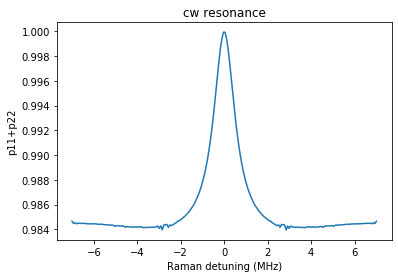

In [61]:
res1 = pd.read_csv('cw_res0.50.csv')
d = res1['detuning (MHz)']
p = res1['p11+p22']

plt.xlabel('Raman detuning (MHz)')
plt.ylabel('p11+p22')
plt.title('cw resonance')
plt.plot(d, p)
#plt.plot(d[40:60], p[40:60])

In [54]:
def cw_contrast(p):

    imax = int(p.size/2)
    pmax = p[imax]
    pmin = pmax
    for i in range(imax-1, 0, -1):
        if (p[i] > p[i+1]):
            pmin = p[i+1]
            break
    return (pmax-pmin)/pmin

In [62]:
cw_contrast(p)

0.015880363392928917

In [56]:
def cw_fwhm(d,p):
    
    imax = int(p.size/2)
    pmax = p[imax]
    
    imin = 0
    pmin = pmax
    for i in range(imax-1, 0, -1):
        if (p[i] > p[i+1]):
            imin = i+1
            pmin = p[i+1]
            break
            
    halfmax = (pmax + pmin)/2
    ihalf=0
    mindiff=1
    for i in range(imax-1, imin, -1):
        diff = abs(p[i]-halfmax)
        if (diff < mindiff):
            mindiff = diff
            ihalf = i
    
    return 2 * (d[imax]-d[ihalf])

In [63]:
cw_fwhm(d,p)

1.2663316582914579

In [64]:
data = [['I', 'contrast', 'fwhm']]
for I1 in np.linspace(0.05, 1, num=20):
    filename = 'cw_res{:.2f}.csv'.format(I1)
    res = pd.read_csv(filename)
    d = res['detuning (MHz)']
    p = res['p11+p22']
    row = [I1, cw_contrast(p), cw_fwhm(d,p)]
    data.append(row)

In [65]:
dataf = pd.DataFrame(data[1:], columns = ['I', 'contrast', 'fwhm'])

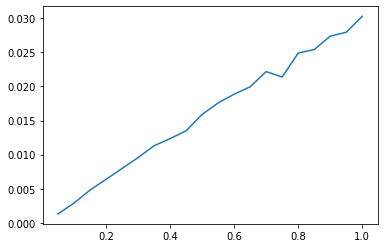

In [66]:
plt.plot(dataf['I'], dataf['contrast'])

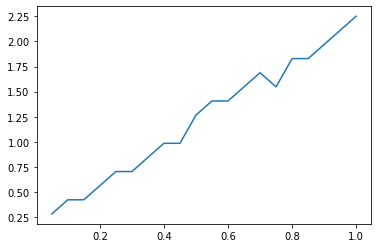

In [67]:
plt.plot(dataf['I'], dataf['fwhm'])

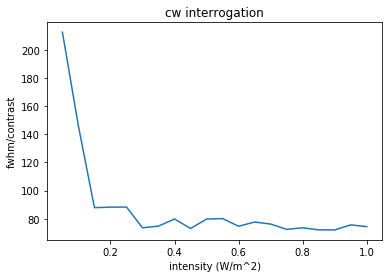

In [77]:
plt.xlabel('intensity (W/m^2)')
plt.ylabel('fwhm/contrast')
plt.title('cw interrogation')
plt.plot(dataf['I'], np.divide(dataf['fwhm'], dataf['contrast']))

In [76]:
filename = 'cw_stability.csv'
with open(filename, "w") as datafile:
        writer = csv.writer(datafile)
        writer.writerow(['I', 'contrast', 'fwhm'])
        for i in range(dataf.shape[0]):
            writer.writerow([dataf['I'][i], dataf['contrast'][i], dataf['fwhm'][i]])
                             